- 1. numpy和pytorch实现梯度下降法
   - a. 设定初始值
   - b. 求取梯度
   - c. 在梯度方向上进行参数的更新
- 2. numpy和pytorch实现线性回归
- 3. pytorch实现一个简单的神经网络

# numpy实现梯度下降

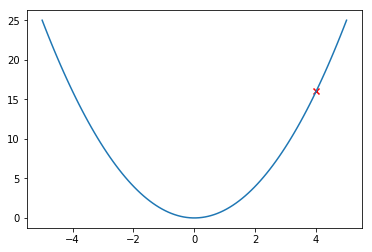

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
x0 = 4
plt.plot(x, np.square(x));
plt.scatter(x0, np.square(x0), c='r', marker='x');

8
7.84
7.6832
7.529536
7.37894528
7.2313663744
7.086739046912
6.94500426597376
6.806104180654285
6.669982097041199
6.536582455100375
6.405850805998368
6.2777337898784005
6.152179114080832
6.0291355317992155
5.908552821163231
5.7903817647399665
5.674574129445167
5.5610826468562635
5.449860993919138
5.340863774040756
5.23404649855994
5.129365568588741
5.026778257216966
4.926242692072627
4.827717838231174
4.731163481466551
4.63654021183722
4.543809407600476
4.452933219448466
4.363874555059497
4.276597063958307
4.191065122679141
4.107243820225558
4.025098943821047
3.944596964944626
3.8657050256457337
3.788390925132819
3.7126231066301627
3.6383706444975594
3.565603231607608
3.4942911669754557
3.4244053436359465
3.3559172367632275
3.288798892027963
3.223022914187404
3.1585624559036556
3.0953912067855827
3.033483382649871
2.9728137149968736
2.9133574406969363
2.8550902918829975
2.7979884860453375
2.742028716324431
2.687188141997942
2.6334443791579836
2.580775491574824
2.5291599817433275
2.478

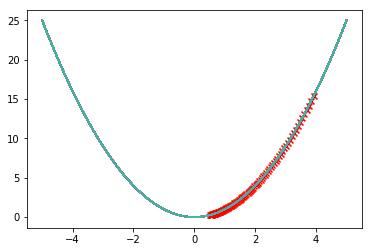

In [2]:
def compute_grad(x):
    return 2*x

def update_param(x, lr=0.01):
    grad = compute_grad(x)
    print(grad)
    return x - lr*grad

for epoch in range(100):
    x0 = update_param(x0)
    plt.plot(x, np.square(x))
    plt.scatter(x0, np.square(x0), c='r', marker='x')

# Pytorch 实现梯度下降

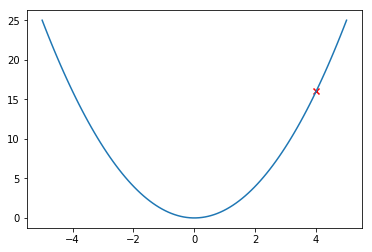

In [3]:
import torch as t
x = t.linspace(-5, 5, 100)
x0 = t.Tensor([4])
plt.plot(x.numpy(), x.numpy()**2);
plt.scatter(x0,x0**2, c='r', marker='x');

tensor([8.])
tensor([15.8400])
tensor([23.3632])
tensor([30.4191])
tensor([36.8667])
tensor([42.5769])
tensor([47.4356])
tensor([51.3456])
tensor([54.2286])
tensor([56.0271])


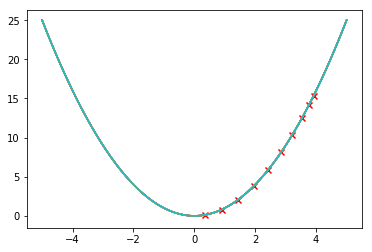

In [4]:
x0.requires_grad=True
lr = 0.01
for epoch in range(10):
    y = x0**2
    y.backward()
    x0.data = x0.data - lr * x0.grad.data
    print(x0.grad.data)
    plt.plot(x.numpy(), x.numpy()**2);
    plt.scatter(x0.detach().numpy(), x0.detach().numpy()**2, c='r', marker='x')

# numpy实现线性回归

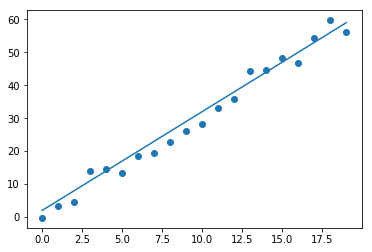

In [5]:
import numpy as np 
np.random.seed(20190407)

x = np.arange(0,20)
y_ = x*3 + 2
noise = np.random.randint(-4, 4,size=(20,)) + np.random.rand(20)
y_ = y_ + noise

import matplotlib.pyplot as plt
plt.scatter(x, y_);
plt.plot(x, x*3+2);

In [6]:
w = 0
b = 0
y = w*x + b
loss = (y-y_)**2

3.0623996954178203 0.2301038524014186


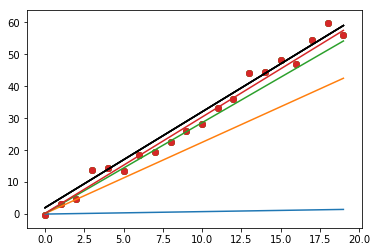

In [7]:
def compute_grad(w, b):
    dw = np.sum((w*x+b-y_)*x)
    db = np.sum(w*x+b-y_)
    return [dw, db]

def update_param(w,b, lr=0.00001):

    grad = compute_grad(w, b)
    w = w - lr * grad[0]
    b = b - lr * grad[1]
    return w, b

for epoch in range(200):
    w, b = update_param(w, b)
    y = w*x+b
    loss = (y-y_)**2
    if epoch % 50 == 0:
        plt.plot(x, 3*x+2, c='k')
        plt.scatter(x, y_)
        plt.plot(x, w*x+b)    
print(w, b)        

# pytorch实现线性回归

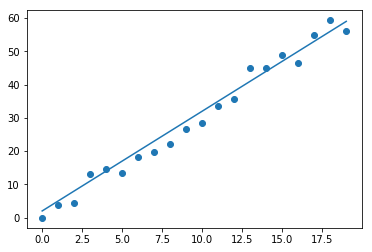

In [8]:
import torch as t
t.manual_seed(20190407)
x = t.arange(0, 20).float()
noise = t.randint(-4, 4, (20,)).float() + t.rand(20)
y_ = 3*x+2 +noise

plt.scatter(x, y_)
plt.plot(x.numpy(), 3*x.numpy()+2);

tensor([3.0729]) tensor([0.2314])


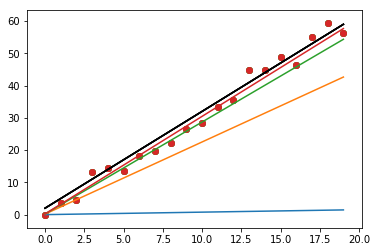

In [11]:
w = t.Tensor([0])
b = t.Tensor([0])
w.requires_grad=True
b.requires_grad=True
criterion = t.nn.MSELoss()
optimizer = t.optim.SGD([w,b], lr=0.0001)

for epoch in range(200):
    optimizer.zero_grad()
    
    y = w*x+b
    loss = criterion(y, y_)
    
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        plt.plot(x.numpy(), 3*x.numpy()+2, c='k')
        plt.scatter(x, y_)
        plt.plot(x.detach().numpy(), (w*x+b).detach().numpy())    
print(w.data, b.data)                

# ResNet

In [14]:
import torch.nn as nn

def conv3x3(in_planes, 
            out_planes, 
            stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride, padding=1, bias=False)

In [16]:
class Building_block(nn.Module):
    expansion = 1
    def __init__(self, 
                 inplanes, 
                 planes, 
                 stride=1, 
                 downsample=None):
        super(Building_block, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride
        
    def forward(self, x):
        residual = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        
        if self.downsample is not None:
            residual = self.downsample(x)
        
        out = out + residual
        out = self.relu(out)
        
        return out

In [17]:
class Bottleneck(nn.Module):
    expansion = 4
    
    def __init__(self, 
                 inplanes, 
                 planes, 
                 stride=1, 
                 downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes*self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes*self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride
        
    def forward(self, x):
        residual = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        
        out = self.conv3(out)
        out = self.bn3(out)
        
        if self.downsample is not None:
            residual = self.downsample(x)
            
        out = out + residual
        out = self.relu(out)
        return out

In [21]:
class Resnet(nn.Module):
    def __init__(self,
                block,
                layers,
                num_classes=None):
        self.inplanes = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(blcok, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AvgPool2d(7, stride=1)
        self.fc = nn.Linear(512*block.expansion, num_classes)
        
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
                
    def _make_layer(self,
                   block, 
                   planes,
                   blocks,
                   stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes*block.expansion, 
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes*block.expansion),)
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))
            
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [22]:
def resnet50(**kwars):
    return Resnet(Bottleneck, [3,4,6,3], **kwargs)